## Steps 1 - 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm

%matplotlib inline

## Step 6

In [2]:
gdp_df=pd.read_csv('data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN
5,Afghanistan,2012,1772.764974,NaN
6,Afghanistan,2011,1626.764793,NaN
7,Afghanistan,2010,1671.581238,NaN
8,Afghanistan,2009,1502.354073,NaN
9,Afghanistan,2008,1267.644939,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN
6500,footnoteSeqID,Footnote,NaN,NaN
6501,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df=gdp_df[0:6500]
#could've used skipfooter or pd.csv('', nrows=) 
# downside of [] is that the data types at the bottom could mess up the slice

In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


## Step 7

In [7]:
gdp_df.shape

(6500, 4)

In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 4 columns):
Country or Area    6500 non-null object
Year               6500 non-null object
Value              6500 non-null float64
Value Footnotes    1 non-null float64
dtypes: float64(2), object(2)
memory usage: 203.2+ KB


## Step 8 

In [9]:
gdp_df=gdp_df.drop(columns={'Value Footnotes'})
gdp_df=gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
# can chain together like gdp = (gdp.drop().rename()...)

In [10]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


## Step 9(a)

In [11]:
continents_df=pd.read_csv('data/continents.csv')

In [12]:
#To be changed in gdp_df
#* Change "CÃ´te d'Ivoire" to "Ivory Coast"
#* Change "CuraÃ§ao" to "Curaçao"
#* Change "SÃ£o TomÃ© and Principe" to "Sao Tome and Principe"
#* Change "Sint Maarten (Dutch part)" to "Sint Maarten"

In [13]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 3 columns):
Country           6500 non-null object
Year              6500 non-null object
GDP_Per_Capita    6500 non-null float64
dtypes: float64(1), object(2)
memory usage: 152.5+ KB


In [14]:
gdp_df = gdp_df.replace({
    "CÃ´te d'Ivoire": 'Ivory Coast', 
    'CuraÃ§ao': 'Curaçao', 
    'SÃ£o TomÃ© and Principe':'Sao Tome and Principe',
    'Sint Maarten (Dutch part)':' "Sint Maarten'
})
# can also use .loc[] and can also just use .replace on just the column but on entire dataframe may be better depending. 

In [15]:
gdp_df[gdp_df.Country=='Ivory Coast']

,Country,Year,GDP_Per_Capita
792,Ivory Coast,2017,3564.595846
793,Ivory Coast,2016,3395.088932
794,Ivory Coast,2015,3225.188859
795,Ivory Coast,2014,3038.844827
796,Ivory Coast,2013,2864.048627
797,Ivory Coast,2012,2696.191639
798,Ivory Coast,2011,2495.495125
799,Ivory Coast,2010,2673.013083
800,Ivory Coast,2009,2682.036638
801,Ivory Coast,2008,2657.672981


## Step 9(b)

In [16]:
gdp_df= pd.merge(continents_df, gdp_df, how='inner')

In [17]:
gdp_df

,Continent,Country,Year,GDP_Per_Capita
0,Asia,Afghanistan,2017,1758.465636
1,Asia,Afghanistan,2016,1757.023490
2,Asia,Afghanistan,2015,1766.593077
3,Asia,Afghanistan,2014,1795.735834
4,Asia,Afghanistan,2013,1807.762344
...,...,...,...,...
5212,Africa,Zimbabwe,1994,2768.309953
5213,Africa,Zimbabwe,1993,2572.870395
5214,Africa,Zimbabwe,1992,2591.007534
5215,Africa,Zimbabwe,1991,2906.272849


## Step 10 

In [18]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5216
Data columns (total 4 columns):
Continent         5217 non-null object
Country           5217 non-null object
Year              5217 non-null object
GDP_Per_Capita    5217 non-null float64
dtypes: float64(1), object(3)
memory usage: 203.8+ KB


In [19]:
%%time

gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 2.39 ms, sys: 525 µs, total: 2.91 ms
Wall time: 2.41 ms


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19068.562312
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [20]:
gdp_df['Continent'] = gdp_df['Continent'].astype('category')

In [21]:
gdp_df

,Continent,Country,Year,GDP_Per_Capita
0,Asia,Afghanistan,2017,1758.465636
1,Asia,Afghanistan,2016,1757.023490
2,Asia,Afghanistan,2015,1766.593077
3,Asia,Afghanistan,2014,1795.735834
4,Asia,Afghanistan,2013,1807.762344
...,...,...,...,...
5212,Africa,Zimbabwe,1994,2768.309953
5213,Africa,Zimbabwe,1993,2572.870395
5214,Africa,Zimbabwe,1992,2591.007534
5215,Africa,Zimbabwe,1991,2906.272849


In [22]:
%%time

gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 1.61 ms, sys: 169 µs, total: 1.77 ms
Wall time: 1.78 ms


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19068.562312
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

## Step 11

In [23]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5216
Data columns (total 4 columns):
Continent         5217 non-null category
Country           5217 non-null object
Year              5217 non-null object
GDP_Per_Capita    5217 non-null float64
dtypes: category(1), float64(1), object(2)
memory usage: 168.3+ KB


In [24]:
gdp_df.columns

Index(['Continent', 'Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [25]:
gdp_df.groupby('Continent').Country.count()

Continent
Africa           1400
Asia             1183
Europe           1202
North America     734
Oceania           365
South America     333
Name: Country, dtype: int64

In [26]:
gdp_df.groupby('Continent').Country.value_counts()

Continent      Country     
Africa         Algeria         28
               Angola          28
               Benin           28
               Botswana        28
               Burkina Faso    28
                               ..
South America  Paraguay        28
               Peru            28
               Suriname        28
               Uruguay         28
               Venezuela       25
Name: Country, Length: 195, dtype: int64

In [27]:
width=gdp_df.groupby('Continent').Country.nunique().to_dict()
width

{'Africa': 53,
 'Asia': 44,
 'Europe': 45,
 'North America': 27,
 'Oceania': 14,
 'South America': 12}

In [28]:
width.keys()

dict_keys(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])

In [29]:
width.values()

dict_values([53, 44, 45, 27, 14, 12])

In [30]:
gdp_df.groupby('Continent').Country.unique()

Continent
Africa           [Algeria, Angola, Benin, Botswana, Burkina Fas...
Asia             [Afghanistan, Bahrain, Bangladesh, Bhutan, Bru...
Europe           [Albania, Armenia, Austria, Azerbaijan, Belaru...
North America    [Antigua and Barbuda, Aruba, The Bahamas, Barb...
Oceania          [Australia, Fiji, Kiribati, Marshall Islands, ...
South America    [Argentina, Bolivia, Brazil, Chile, Colombia, ...
Name: Country, dtype: object

In [31]:
gdp_df.Continent.unique()

[Asia, Europe, Africa, North America, South America, Oceania]
Categories (6, object): [Asia, Europe, Africa, North America, South America, Oceania]

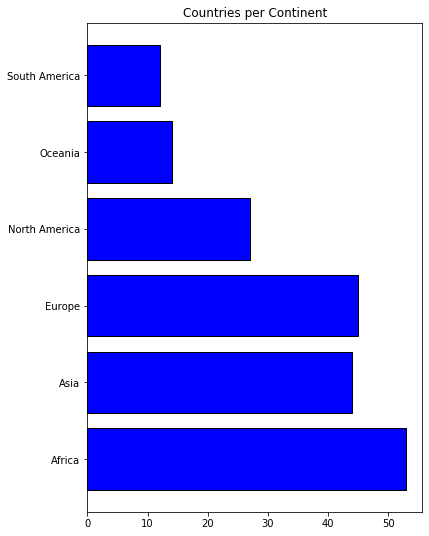

In [32]:
plt.figure(figsize = (6, 9))
plt.barh(y=list(width.keys()), width=list(width.values()) , color = 'blue', edgecolor = 'black');
plt.title("Countries per Continent");

## Step 12

In [33]:
#How many countries are represented in this dataset? What range of years are represented?

In [34]:
gdp_df.Country.nunique()

195

In [35]:
gdp_df.columns

Index(['Continent', 'Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [36]:
gdp_df.Year.nunique()

28

## Step 13

In [37]:
#Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [38]:
gdp_df.Year[19]

'2014'

In [39]:
gdp_df.groupby('Year').nunique()

,Continent,Country,Year,GDP_Per_Capita
Year,,,,
1990,6,166,1,166
1991,6,167,1,167
1992,6,169,1,169
1993,6,171,1,171
1994,6,174,1,174
1995,6,180,1,180
1996,6,180,1,180
1997,6,182,1,182
1998,6,183,1,183


In [40]:
gdp_2014=gdp_df[gdp_df['Year'] == '2014']
gdp_2014

,Continent,Country,Year,GDP_Per_Capita
3,Asia,Afghanistan,2014,1795.735834
19,Europe,Albania,2014,10700.522802
47,Africa,Algeria,2014,13549.025150
75,Africa,Angola,2014,6813.052106
103,North America,Antigua and Barbuda,2014,20820.551057
...,...,...,...,...
5084,Asia,Vietnam,2014,5312.492183
5112,Asia,West Bank and Gaza,2014,4445.307470
5136,Asia,Yemen,2014,3828.484887
5164,Africa,Zambia,2014,3684.685507


## Step 14

In [41]:
gdp_2014.describe()

,GDP_Per_Capita
count,192.000000
mean,18706.998123
std,20708.344052
min,377.908916
25%,4078.542518
50%,11822.492901
75%,26304.316361
max,130439.187070


## Step 15(a) 

In [42]:
gdp_2014.max(0)
# could use nlargest()

Continent         South America
Country                Zimbabwe
Year                       2014
GDP_Per_Capita           130439
dtype: object

In [43]:
gdp_2014.sort_values(by='GDP_Per_Capita').head()
# could use .min()

,Continent,Country,Year,GDP_Per_Capita
3006,Africa,Mauritania,2014,377.908916
924,Africa,Central African Republic,2014,676.675821
767,Africa,Burundi,2014,768.469837
1120,Africa,Dem. Rep. Congo,2014,784.872656
3425,Africa,Niger,2014,900.136918


In [44]:
gdp_2014.sort_values(by='GDP_Per_Capita').tail()

,Continent,Country,Year,GDP_Per_Capita
683,Asia,Brunei,2014,76448.593329
4222,Asia,Singapore,2014,81965.361071
2759,Europe,Luxembourg,2014,92349.186486
3835,Asia,Qatar,2014,116693.507701
2787,Asia,"Macao SAR, China",2014,130439.187070


## Step 16

In [45]:
#Add a column to your 2014 dataframe called 'GDP_Group'. 
#In this column, assign each country to one of three categories: 
#"Low" if the country's GDP Per Capita is below the 25th percentile 
    #of GDP Per Capita, "Medium" if it is between the 25th and 75th 
    #percentile, and "High" if it is above the 75th percentile. 
#How do the continents differ in terms of numbers of countries in 
#each group?

In [46]:
def categ(x): 
    per25=np.percentile(gdp_2014.loc[:,['GDP_Per_Capita']], 25)
    per50=np.percentile(gdp_2014.loc[:,['GDP_Per_Capita']], 50)
    per75=np.percentile(gdp_2014.loc[:,['GDP_Per_Capita']],75)
    
    if x < per25: 
        return 'Low'
    if x > per75: 
        return 'High'
        
    return 'Medium'

gdp_2014['GDP_Group']=gdp_2014['GDP_Per_Capita'].apply(categ)
gdp_2014

# Could be improved by putting per25 and per75 before the function (delete per50) That way it just compares the input against the function. Don't want things computed multiple times. 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Continent,Country,Year,GDP_Per_Capita,GDP_Group
3,Asia,Afghanistan,2014,1795.735834,Low
19,Europe,Albania,2014,10700.522802,Medium
47,Africa,Algeria,2014,13549.025150,Medium
75,Africa,Angola,2014,6813.052106,Medium
103,North America,Antigua and Barbuda,2014,20820.551057,Medium
...,...,...,...,...,...
5084,Asia,Vietnam,2014,5312.492183,Medium
5112,Asia,West Bank and Gaza,2014,4445.307470,Medium
5136,Asia,Yemen,2014,3828.484887,Low
5164,Africa,Zambia,2014,3684.685507,Low


## Step 15(b)/17(a)

''

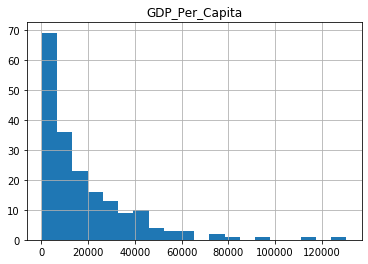

In [47]:
gdp_2014.hist(bins=20)
;

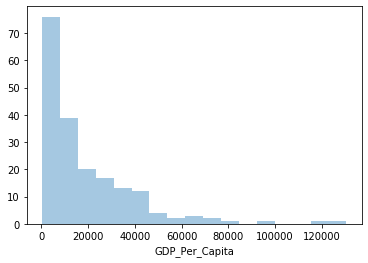

In [48]:
sns.distplot(gdp_2014['GDP_Per_Capita'], kde=False);
#kde=kernal density estimate and adds a line

## Step 17(b)

In [49]:
#Using Scipy, find the skewness of GDP_Per_Capita values 
skew(gdp_2014['GDP_Per_Capita'])

2.238776247132382

## Step 18

In [50]:
#Create a seaborn boxplot showing GDP per capita in 2014 split
#out by continent. What do you notice?

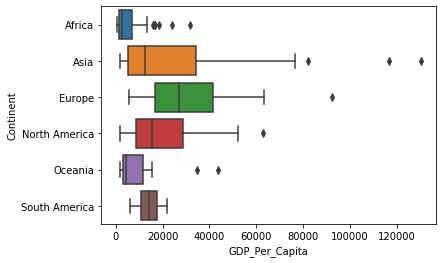

In [51]:
sns.boxplot(data=gdp_2014, x='GDP_Per_Capita',y='Continent');

## Step 19

In [52]:
#Pivot the data (using the pandas `.pivot()` method) so that we 
#can calculate % change in GDP Per Capita from 1990 to 2017 - drop 
#any countries that are missing GDP numbers for at least one of these 
#two years.

In [53]:
gdp_df_pivot=gdp_df.pivot('Country', 'Year', 'GDP_Per_Capita')
# Michael just chained this cell and the next one together. 

In [54]:
gdp_df_pivot=gdp_df_pivot[['1990','2017']]

In [55]:
gdp_df_pivot.head()

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247662,11803.283883
Algeria,10297.842349,13876.294642
Angola,4761.229638,6044.972035
Antigua and Barbuda,17472.946483,22855.748017


In [56]:
gdp_df_pivot=gdp_df_pivot.dropna()
gdp_df_pivot.head()

Year,1990,2017
Country,,
Albania,4458.247662,11803.283883
Algeria,10297.842349,13876.294642
Angola,4761.229638,6044.972035
Antigua and Barbuda,17472.946483,22855.748017
Argentina,11372.823108,18945.144022


## Step 20

In [57]:
#20. What percentage of countries or areas experienced a positive % change 
#in GDP per capita? What percentage experienced a negative % change?

In [58]:
pctchange=gdp_df_pivot.pct_change(axis='columns')
pctchange.head()

Year,1990,2017
Country,,
Albania,NaN,1.647516
Algeria,NaN,0.347495
Angola,NaN,0.269624
Antigua and Barbuda,NaN,0.308065
Argentina,NaN,0.665826


In [59]:
negatives=pctchange[(pctchange['2017'] < 1)==True]
count=negatives['2017'].count()
count
count/pctchange['2017'].count()

0.725609756097561

72.6% of countries had a negative change in GDP per capita

In [60]:
positives=1-0.725609756097561
positives

0.27439024390243905

27.4% of countries saw a positive change in GDP per capita

## Step 21

In [61]:
# 21. Which country had the highest % change in GDP per capita? Create a line plot 
# showing this country's GDP per capita from 1990 to 2017.

In [62]:
pctchange.idxmax()

Year
1990                  NaN
2017    Equatorial Guinea
dtype: object

In [63]:
pctchange['2017'].nlargest(2)

Country
Equatorial Guinea    20.909735
China                 9.022572
Name: 2017, dtype: float64

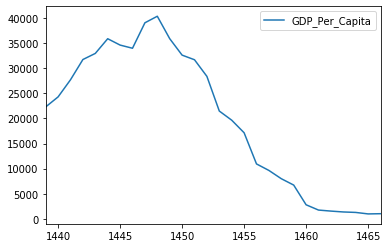

In [64]:
gdp_df[gdp_df['Country']=='Equatorial Guinea'].plot();
# This trend looks backward compared to Michael's

## Step 22 

In [65]:
# 22. Create another showing the country with the second highest
# % change in GDP. How do the trends in these countries compare?

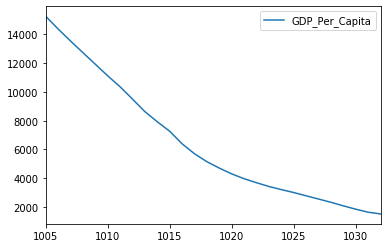

In [66]:
gdp_df[gdp_df['Country']=='China'].plot();
# This one also looks backward

In [67]:
# These two trends differ in that China's GDP steadily grew to 
# match the increase in population whereas in Equatorial New Guinea, 
# there was a brief period when the population grew faster than the GDP. 

## Step 23/24

In [68]:
# 24. Read in internet_use.csv into a DataFrame called `internet_df`. 
# You will most likely get an error message when doing this - figure out
# what is going wrong and fix it. Take a look at the first and last five 
# rows and make any corrections to your `read_csv()` call to fix this. 
# Again, **do not** modify the original datasets. 

In [69]:
internet_df=pd.read_csv('data/internet_use.csv', nrows=4495)

In [70]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [71]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


## Step 25

In [72]:
# 25. How many rows and columns does this new dataset have? What are
# the types of its columns?

In [73]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
Country or Area    4495 non-null object
Year               4495 non-null int64
Value              4495 non-null float64
Value Footnotes    948 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


In [74]:
# I could've used .shape here but .info() has all the info you need 
# (pun intended).

## Step 26 

In [75]:
# 26.	Change the columns for the Internet Users data frame to 
# ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [76]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [77]:
internet_df=internet_df.drop(columns={'Value Footnotes'})
internet_df=internet_df.rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})


## Step 27

In [78]:
# 27.	Merge `gdf_df` and `internet_df` (on Country and Year) into 
# a single DataFrame named `gdp_and_internet_use`. Keep only countries
# and years that appear in both tables.

In [79]:
gdp_and_internet_use=pd.concat([gdp_df, internet_df])
gdp_and_internet_use.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Continent,Country,GDP_Per_Capita,Internet_Users_Pct,Year
0,Asia,Afghanistan,1758.465636,NaN,2017
1,Asia,Afghanistan,1757.023490,NaN,2016
2,Asia,Afghanistan,1766.593077,NaN,2015
3,Asia,Afghanistan,1795.735834,NaN,2014
4,Asia,Afghanistan,1807.762344,NaN,2013


In [80]:
gdp_df.head()

,Continent,Country,Year,GDP_Per_Capita
0,Asia,Afghanistan,2017,1758.465636
1,Asia,Afghanistan,2016,1757.023490
2,Asia,Afghanistan,2015,1766.593077
3,Asia,Afghanistan,2014,1795.735834
4,Asia,Afghanistan,2013,1807.762344


In [81]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [82]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
Country               4495 non-null object
Year                  4495 non-null int64
Internet_Users_Pct    4495 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


In [83]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5216
Data columns (total 4 columns):
Continent         5217 non-null category
Country           5217 non-null object
Year              5217 non-null object
GDP_Per_Capita    5217 non-null float64
dtypes: category(1), float64(1), object(2)
memory usage: 328.3+ KB


In [84]:
internet_df.Year=internet_df.Year.astype('object')

In [85]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
Country               4495 non-null object
Year                  4495 non-null object
Internet_Users_Pct    4495 non-null float64
dtypes: float64(1), object(2)
memory usage: 105.5+ KB


In [86]:
internet_df.Year=internet_df.Year.astype('int64')
gdp_df.Year=gdp_df.Year.astype('int64')

In [87]:
gdp_and_internet_use=pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='inner')
gdp_and_internet_use.head()

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Asia,Afghanistan,2014,1795.735834,6.390000
1,Asia,Afghanistan,2013,1807.762344,5.900000
2,Asia,Afghanistan,2012,1772.764974,5.454545
3,Asia,Afghanistan,2011,1626.764793,5.000000
4,Asia,Afghanistan,2010,1671.581238,4.000000


## Step 28

In [88]:
# 28.	Look at the first five rows of your new data frame to confirm 
# it merged correctly. Also, check the last five rows to make sure the
# data is clean and as expected.

In [89]:
gdp_and_internet_use.tail()

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3528,Africa,Zimbabwe,1997,3036.422224,0.033080
3529,Africa,Zimbabwe,1996,2985.856605,0.016790
3530,Africa,Zimbabwe,1995,2736.486436,0.007684
3531,Africa,Zimbabwe,1994,2768.309953,0.001739
3532,Africa,Zimbabwe,1990,2819.549467,0.000000


## Step 29

In [90]:
# 29. Create a new DataFrame, named 'gdp_and_internet_use_2014`
# extracting data for the year 2014 from `gdp_and_internet_use`. What 
# is the mean internet users percentage in 2014? How many countries 
# have at least 90% internet users in 2014?

In [91]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [92]:
gdp_and_internet_use_2014

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Asia,Afghanistan,2014,1795.735834,6.39
13,Europe,Albania,2014,10700.522802,60.10
34,Africa,Algeria,2014,13549.025150,18.09
56,Africa,Angola,2014,6813.052106,21.26
76,North America,Antigua and Barbuda,2014,20820.551057,64.00
...,...,...,...,...,...
3425,Oceania,Vanuatu,2014,2837.122659,18.80
3445,South America,Venezuela,2014,17131.386907,57.00
3469,Asia,Yemen,2014,3828.484887,22.55
3489,Africa,Zambia,2014,3684.685507,17.34


In [93]:
gdp_and_internet_use_2014.Internet_Users_Pct.mean()

44.550727151515154

In [94]:
gdp_and_internet_use_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 3511
Data columns (total 5 columns):
Continent             165 non-null category
Country               165 non-null object
Year                  165 non-null int64
GDP_Per_Capita        165 non-null float64
Internet_Users_Pct    165 non-null float64
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 6.8+ KB


In [95]:
gdp_and_internet_use_2014[(gdp_and_internet_use_2014.Internet_Users_Pct) >= .9].count()


Continent             165
Country               165
Year                  165
GDP_Per_Capita        165
Internet_Users_Pct    165
dtype: int64

In [96]:
# 165 countries have an internet users percentage of at least 90%. 
# I'm not sure I did this correctly. Pretty sure its wrong 

## Step 30

In [97]:
# 30. Find the countries that had the top 5 largest GDP per capita 
# figures for 2014. Create a seaborn FacetGrid showing the change in 
# internet user percentage over time for these five countries. What 
# trends do you notice?

In [98]:
gdp_and_internet_use_2014.GDP_Per_Capita.nlargest(5)

2556    116693.507701
1812     92349.186486
2800     81965.361071
1685     72588.486007
2310     63419.314779
Name: GDP_Per_Capita, dtype: float64

In [99]:
gdp_and_internet_use_2014.nlargest(5, 'GDP_Per_Capita')

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2556,Asia,Qatar,2014,116693.507701,91.49
1812,Europe,Luxembourg,2014,92349.186486,94.67
2800,Asia,Singapore,2014,81965.361071,82.00
1685,Asia,Kuwait,2014,72588.486007,78.70
2310,Europe,Norway,2014,63419.314779,96.30


In [100]:
### This is where it gets fishy. I'm trying to make a Facet grid...

In [101]:
top_5_df=gdp_and_internet_use_2014.nlargest(5, 'GDP_Per_Capita')

In [102]:
top_5_df=pd.DataFrame({'Country':['Qatar','Luxembourg','Singapore','Kuwait','Norway'], 'Year':['2014','2014','2014','2014','2014'], 'Internet_Users_Pct':['91.49','94.67','82.00','78.70','96.30']})

In [103]:
top_5_df

,Country,Year,Internet_Users_Pct
0,Qatar,2014,91.49
1,Luxembourg,2014,94.67
2,Singapore,2014,82.00
3,Kuwait,2014,78.70
4,Norway,2014,96.30


In [104]:
top_5_df_list = top_5_df.Country.tolist()

In [105]:
top_5_df_list

['Qatar', 'Luxembourg', 'Singapore', 'Kuwait', 'Norway']

In [106]:
top_5_main_df= gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(top_5_df_list)]

In [107]:
top_5_main_df.head()

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1685,Asia,Kuwait,2014,72588.486007,78.700000
1686,Asia,Kuwait,2013,75597.292936,75.460000
1687,Asia,Kuwait,2012,78700.458568,70.450000
1688,Asia,Kuwait,2011,78021.671676,65.769071
1689,Asia,Kuwait,2010,75359.963489,61.400000


In [108]:
# Create an empty list 
top_5_list =[] 
  
# Iterate over each row 
for index, rows in top_5_df.iterrows(): 
    # Create list for the current row 
    my_list =[rows.Country, rows.Year, rows.Internet_Users_Pct] 
      
    # append the list to the final list 
    top_5_list.append(my_list) 
  
# Print the list 
print(top_5_list) 

[['Qatar', '2014', '91.49'], ['Luxembourg', '2014', '94.67'], ['Singapore', '2014', '82.00'], ['Kuwait', '2014', '78.70'], ['Norway', '2014', '96.30']]


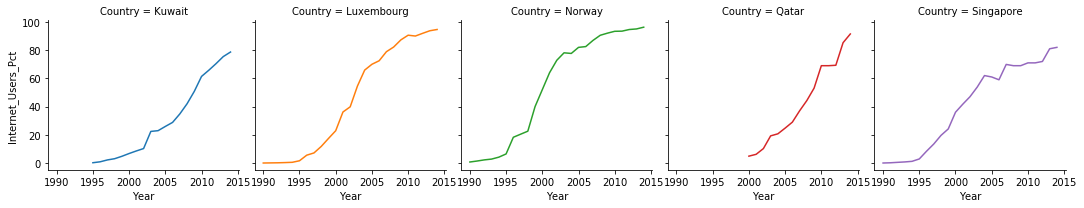

In [109]:
top_5_graph=sns.FacetGrid(top_5_main_df, col='Country', hue = 'Country')
top_5_graph.map(plt.plot, "Year","Internet_Users_Pct");


## Step 31

In [110]:
# 31. Create a scatter plot of Internet Use vs GDP per Capita for 
# the year 2014.

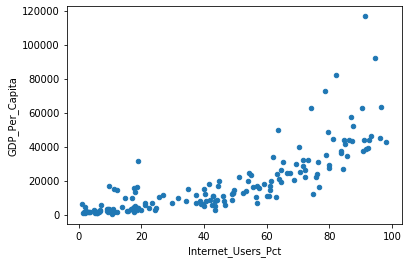

In [111]:
gdp_and_internet_use_2014.plot(kind='scatter', x = 'Internet_Users_Pct', y = 'GDP_Per_Capita');
# My axes are flipped compared to Michael's 

## Step 32

In [112]:
# 32. Find the correlation between GDP per Capita and Internet Use for 
# the year 2014. What is the meaning of this number?

In [113]:
gdp_and_internet_use_2014.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.788933
Internet_Users_Pct,NaN,0.788933,1.000000


In [114]:
# The correlation between GDP Per Capita and Internet Use is 0.788933. 

## Step 33

In [115]:
# 33. Using the statsmodels library, create an ordinary linear 
# regression model with independent variable GDP per capita and 
# dependent variable internet users percentage for the year 2014. 
# Be sure to include an intercept term. Print the model summary. 
# What R^2 value do you get for this model? What is the meaning of 
# this number?

In [116]:
import statsmodels.api as sm

X = gdp_and_internet_use_2014["GDP_Per_Capita"]
y = gdp_and_internet_use_2014["Internet_Users_Pct"]
# need this! x=sm.add_constant(x)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model


# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Internet_Users_Pct   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              633.9
Date:                Thu, 03 Oct 2019   Prob (F-statistic):                    3.17e-58
Time:                        17:45:25   Log-Likelihood:                         -759.59
No. Observations:                 165   AIC:                                      1521.
Df Residuals:                     164   BIC:                                      1524.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
GDP_Per_Capita     0.0018   7.13e-05     25.177      0.000       0.002       0.002
==============================================================================
Omnibus:                      103.254   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              764.069
Skew:                          -2.228   Prob(JB):                    1.21e-166
Kurtosis:                      12.554   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 34

In [117]:
# 34. Add a column to `gdp_and_internet_use_2014` and calculate 
# the logarithm of GDP per capita. Find the correlation between the 
# log of GDP per capita and internet users percentage. Run an ordinary 
# linear regression with response variable internet users and 
# explanatory variable the log of the GDP per capita, and view the 
# model summary. What is the meaning of the coefficients you get? 
# Which of the two models that you created appears to do a better job?

In [118]:
gdp_and_internet_use_2014.columns

Index(['Continent', 'Country', 'Year', 'GDP_Per_Capita', 'Internet_Users_Pct'], dtype='object')

In [119]:
gdp_and_internet_use_2014.GDP_Per_Capita.dtype

dtype('float64')

In [120]:
gdp_and_internet_use_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 3511
Data columns (total 5 columns):
Continent             165 non-null category
Country               165 non-null object
Year                  165 non-null int64
GDP_Per_Capita        165 non-null float64
Internet_Users_Pct    165 non-null float64
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 6.8+ KB


In [121]:
gdp_and_internet_use_2014['log_GDP_Per_Capita']=np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
gdp_and_internet_use_2014['log_GDP_Per_Capita']

0       7.493170
13      9.278048
34      9.514070
56      8.826595
76      9.943696
          ...   
3425    7.950546
3445    9.748668
3469    8.250224
3489    8.211940
3511    7.826639
Name: log_GDP_Per_Capita, Length: 165, dtype: float64

## Step 35

In [123]:
# 35. Filter the original dataset down to just the United States for 
# all available years. Calculate correlation between internet use and 
# gdp per capita. Is this meaningful or useful?

In [124]:
US_df = gdp_and_internet_use['Country'].str.contains('United States')

In [125]:
US_df.value_counts()

False    3508
True       25
Name: Country, dtype: int64

In [126]:
gdp_and_internet_use.head()

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Asia,Afghanistan,2014,1795.735834,6.390000
1,Asia,Afghanistan,2013,1807.762344,5.900000
2,Asia,Afghanistan,2012,1772.764974,5.454545
3,Asia,Afghanistan,2011,1626.764793,5.000000
4,Asia,Afghanistan,2010,1671.581238,4.000000


In [127]:
US_df_real=gdp_and_internet_use[gdp_and_internet_use['Country']=='United States']
US_df_real

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3379,North America,United States,2014,52080.792568,87.360000
3380,North America,United States,2013,51208.892428,84.200000
3381,North America,United States,2012,50632.443448,79.300000
3382,North America,United States,2011,49883.113984,69.729461
3383,North America,United States,2010,49479.248679,71.690000
3384,North America,United States,2009,48644.151110,71.000000
3385,North America,United States,2008,50349.715321,74.000000
3386,North America,United States,2007,50897.731238,75.000000
3387,North America,United States,2006,50437.806235,68.931193
3388,North America,United States,2005,49512.926789,67.968053


In [128]:
US_df_real['Country'].describe()

count                25
unique                1
top       United States
freq                 25
Name: Country, dtype: object

In [129]:
US_df_real.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,1.000000,0.963218,0.969113
GDP_Per_Capita,0.963218,1.000000,0.991618
Internet_Users_Pct,0.969113,0.991618,1.000000


In [130]:
# This correlation seems pretty strong. I'm not sure if it necessarily 
# means what we think, however. 

## Solo Exploration 

In [131]:
### Solo Exploration and Presentation:
# 1. Choose and download another data set from the UN data (http://data.un.org/Explorer.
# aspx) to merge with your data and explore.
# 1. Prepare a short (< 5 minute) presentation of your findings. Report any interesting 
# correlations you find. Include visualizations and consider adding interactivity with 
# `ipywidgets`. This presentation can be done either in a Jupyter Notebook or using another
# presentation software, such as PowerPoint. (Check out Jupyter Slides if you have time. This
# allows you to turn your jupyter notebook into a slideshow: https://medium.com/learning-mach
# ine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f)
# 2.    If time allows, look through the bokeh gallery (https://bokeh.pydata.org/en/latest
# /docs/gallery.html#gallery) and try building some visualizations of your findings.


In [132]:
gdp_df.head()

,Continent,Country,Year,GDP_Per_Capita
0,Asia,Afghanistan,2017,1758.465636
1,Asia,Afghanistan,2016,1757.023490
2,Asia,Afghanistan,2015,1766.593077
3,Asia,Afghanistan,2014,1795.735834
4,Asia,Afghanistan,2013,1807.762344


In [133]:
gdp_and_internet_use.head()

,Continent,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Asia,Afghanistan,2014,1795.735834,6.390000
1,Asia,Afghanistan,2013,1807.762344,5.900000
2,Asia,Afghanistan,2012,1772.764974,5.454545
3,Asia,Afghanistan,2011,1626.764793,5.000000
4,Asia,Afghanistan,2010,1671.581238,4.000000


In [134]:
Fam_planning_df= pd.read_csv('data/UNMET_NEED_FOR_FAMILY_PLANNING_Table_1.csv')

In [135]:
Fam_planning_df.head()

,"United Nations, Department of Economic and Social Affairs",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,"Population Division, Fertility and Family Plan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World Contraceptive Use 2014\nSURVEY-BASED OBS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country,ISO Code,Year(s),Age,Unmet need,NaN,NaN,Source,Survey name,Note on population,NaN,Note on unmet need indicator,Note on country,NaN
3,NaN,NaN,NaN,NaN,Total,Spacing,Limiting,NaN,NaN,1,2,NaN,NaN,NaN
4,Albania,008,2002,15-44,1.3,1.0,0.3,RHS,NaN,"Excluding women who are currently pregnant, cu...","Including fecund married women, currently sexu...",NaN,NaN,NaN


In [136]:
Fam_planning_df.tail()

,"United Nations, Department of Economic and Social Affairs",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
373,Zambia,894,2007,15-49,26.6,15.9,10.6,DHS,NaN,NaN,NaN,NaN,NaN,NaN
374,Zimbabwe,716,1994,15-49,19.1,10.6,8.5,DHS,NaN,NaN,NaN,NaN,NaN,NaN
375,Zimbabwe,716,1999,15-49,16.7,8.5,8.2,DHS,NaN,NaN,NaN,NaN,NaN,NaN
376,Zimbabwe,716,2005-2006,15-49,15.5,7.2,8.2,DHS,NaN,NaN,NaN,NaN,NaN,NaN
377,Zimbabwe,716,2010-2011,15-49,14.6,8.7,5.9,DHS,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
Fam_planning_df = Fam_planning_df[4:]

In [138]:
Fam_planning_df.head()

,"United Nations, Department of Economic and Social Affairs",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
4,Albania,008,2002,15-44,1.3,1.0,0.3,RHS,NaN,"Excluding women who are currently pregnant, cu...","Including fecund married women, currently sexu...",NaN,NaN,NaN
5,Albania,008,2008-2009,15-49,12.9,3.5,9.4,DHS,NaN,NaN,NaN,NaN,NaN,NaN
6,Armenia,051,2000,15-49,18.1,3.5,14.6,DHS,NaN,NaN,NaN,NaN,NaN,NaN
7,Armenia,051,2005,15-49,19.3,3.9,15.5,DHS,NaN,NaN,NaN,NaN,NaN,NaN
8,Armenia,051,2010,15-49,13.5,5.3,8.2,DHS,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
Fam_planning_df.columns

Index(['United Nations, Department of Economic and Social Affairs',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [140]:

Fam_planning_df = Fam_planning_df.drop(columns={'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'})

Fam_planning_df = Fam_planning_df.rename(columns={'United Nations, Department of Economic and Social Affairs':'Country','Unnamed: 1':'ISO Code','Unnamed: 2':'Year','Unnamed: 3':'Age','Unnamed: 4':'Unmet_Need_Total','Unnamed: 5':'Unmet Need: Spacing','Unnamed: 6':'Unmet Need: Limiting','Unnamed: 7':'Source'})



In [141]:
Fam_planning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 4 to 377
Data columns (total 8 columns):
Country                 374 non-null object
ISO Code                374 non-null object
Year                    374 non-null object
Age                     374 non-null object
Unmet_Need_Total        374 non-null object
Unmet Need: Spacing     374 non-null object
Unmet Need: Limiting    374 non-null object
Source                  374 non-null object
dtypes: object(8)
memory usage: 23.5+ KB


In [142]:
gdp_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5216
Data columns (total 4 columns):
Continent         5217 non-null category
Country           5217 non-null object
Year              5217 non-null int64
GDP_Per_Capita    5217 non-null float64
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 328.3+ KB


In [143]:
Fam_planning_df = Fam_planning_df[~Fam_planning_df.Year.astype('str').str.contains('-')]

In [144]:
Fam_planning_df.Year = Fam_planning_df.Year.astype('int64')

In [145]:
gdp_contraceptives_df= pd.merge(gdp_df, Fam_planning_df, on=['Country','Year'])

In [146]:
gdp_contraceptives_df.head()

,Continent,Country,Year,GDP_Per_Capita,ISO Code,Age,Unmet_Need_Total,Unmet Need: Spacing,Unmet Need: Limiting,Source
0,Europe,Albania,2002,6238.120489,008,15-44,1.3,1.0,0.3,RHS
1,Europe,Armenia,2010,6702.829370,051,15-49,13.5,5.3,8.2,DHS
2,Europe,Armenia,2005,5356.596456,051,15-49,19.3,3.9,15.5,DHS
3,Europe,Armenia,2000,2924.744521,051,15-49,18.1,3.5,14.6,DHS
4,Europe,Azerbaijan,2006,10882.234670,031,15-49,15.4,3.0,12.5,DHS


In [147]:
# Looked at just 2005

In [148]:

gdp_contraceptives_2005=gdp_contraceptives_df[gdp_contraceptives_df['Year'] == 2005]
gdp_contraceptives_2005.head()


,Continent,Country,Year,GDP_Per_Capita,ISO Code,Age,Unmet_Need_Total,Unmet Need: Spacing,Unmet Need: Limiting,Source
2,Europe,Armenia,2005,5356.596456,051,15-49,19.3,3.9,15.5,DHS
21,Asia,Cambodia,2005,1968.823385,116,15-49,25.3,8.5,16.8,DHS
27,Africa,Cabo Verde,2005,4759.132611,132,15-49,16.7,6.4,10.3,DHS
38,Africa,Congo,2005,4867.922658,178,15-49,19.5,14.0,5.5,DHS
41,Europe,Czech Republic,2005,25781.204706,203,18-49,8.1,..,..,GGS


In [149]:
gdp_contraceptives_2005.columns

Index(['Continent', 'Country', 'Year', 'GDP_Per_Capita', 'ISO Code', 'Age',
       'Unmet_Need_Total', 'Unmet Need: Spacing', 'Unmet Need: Limiting',
       'Source'],
      dtype='object')

In [150]:
gdp_contraceptives_2005.Year.loc[2]

2005

In [151]:
gdp_contraceptives_2005.reset_index()

,index,Continent,Country,Year,GDP_Per_Capita,ISO Code,Age,Unmet_Need_Total,Unmet Need: Spacing,Unmet Need: Limiting,Source
0,2,Europe,Armenia,2005,5356.596456,051,15-49,19.3,3.9,15.5,DHS
1,21,Asia,Cambodia,2005,1968.823385,116,15-49,25.3,8.5,16.8,DHS
2,27,Africa,Cabo Verde,2005,4759.132611,132,15-49,16.7,6.4,10.3,DHS
3,38,Africa,Congo,2005,4867.922658,178,15-49,19.5,14.0,5.5,DHS
4,41,Europe,Czech Republic,2005,25781.204706,203,18-49,8.1,..,..,GGS
5,53,Africa,Egypt,2005,8136.544631,818,15-49,12.3,3.5,8.8,DHS
6,65,Africa,Ethiopia,2005,736.033196,231,15-49,36.1,19.5,16.6,DHS
7,71,Europe,Georgia,2005,5245.176866,268,15-44,16.3,4.3,12.0,RHS
8,79,Africa,Guinea,2005,1598.167734,324,15-49,21.9,13.4,8.5,DHS
9,174,Africa,Rwanda,2005,1063.405620,646,15-49,38.5,23.5,14.9,DHS


In [152]:
gdp_contraceptives_2005.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2 to 178
Data columns (total 10 columns):
Continent               11 non-null category
Country                 11 non-null object
Year                    11 non-null int64
GDP_Per_Capita          11 non-null float64
ISO Code                11 non-null object
Age                     11 non-null object
Unmet_Need_Total        11 non-null object
Unmet Need: Spacing     11 non-null object
Unmet Need: Limiting    11 non-null object
Source                  11 non-null object
dtypes: category(1), float64(1), int64(1), object(7)
memory usage: 1.4+ KB


In [153]:
gdp_contraceptives_2005['Unmet_Need_Total']=gdp_contraceptives_2005['Unmet_Need_Total'].astype('float64')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


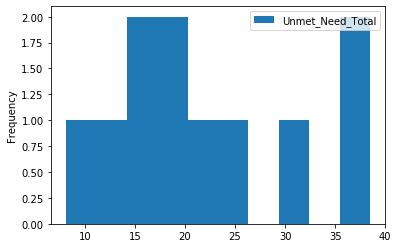

In [154]:
gdp_contraceptives_2005.plot(kind='hist', x='GDP_Per_Capita',y='Unmet_Need_Total');

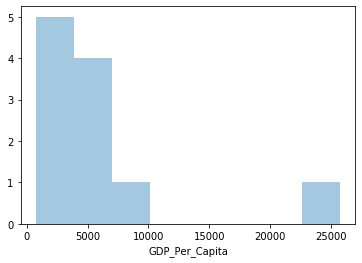

In [155]:
sns.distplot(gdp_contraceptives_2005['GDP_Per_Capita'], kde=False);
#kde=kernal density estimate and adds a line

In [156]:
gdp_contraceptives_2005.head()

,Continent,Country,Year,GDP_Per_Capita,ISO Code,Age,Unmet_Need_Total,Unmet Need: Spacing,Unmet Need: Limiting,Source
2,Europe,Armenia,2005,5356.596456,051,15-49,19.3,3.9,15.5,DHS
21,Asia,Cambodia,2005,1968.823385,116,15-49,25.3,8.5,16.8,DHS
27,Africa,Cabo Verde,2005,4759.132611,132,15-49,16.7,6.4,10.3,DHS
38,Africa,Congo,2005,4867.922658,178,15-49,19.5,14.0,5.5,DHS
41,Europe,Czech Republic,2005,25781.204706,203,18-49,8.1,..,..,GGS


In [157]:
gdp_contraceptives_2005.groupby('Continent').Country.count()

Continent
Africa           7
Asia             1
Europe           3
North America    0
Oceania          0
South America    0
Name: Country, dtype: int64

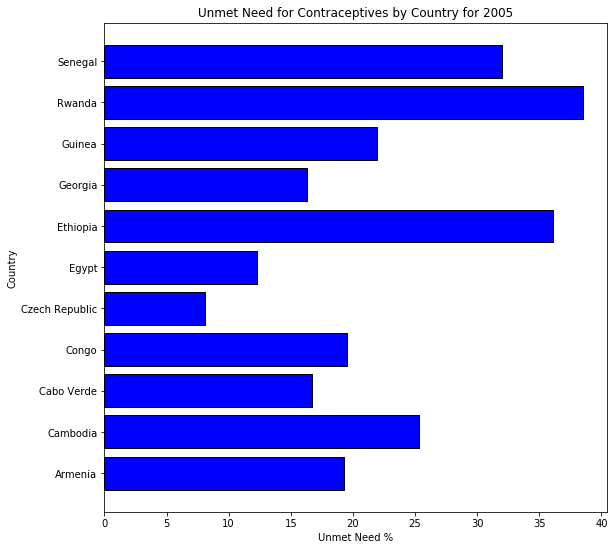

In [158]:
plt.figure(figsize = (9, 9))
plt.barh(y=gdp_contraceptives_2005['Country'], width= gdp_contraceptives_2005['Unmet_Need_Total'], color = 'blue', edgecolor = 'black');
plt.title("Unmet Need for Contraceptives by Country for 2005")
plt.xlabel('Unmet Need %')
plt.ylabel('Country')
plt.show();
#these labels aren't showing up...must be doing something wrong. 

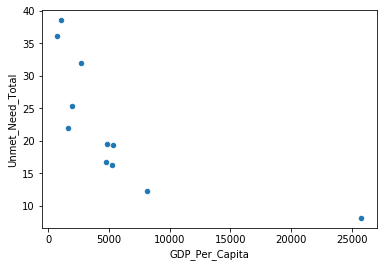

In [159]:
gdp_contraceptives_2005.plot(kind='scatter', x = 'GDP_Per_Capita', y = 'Unmet_Need_Total');

In [160]:
gdp_contraceptives_2005.groupby('Continent').Country.describe()

,count,unique,top,freq
Continent,,,,
Africa,7,7,Ethiopia,1
Asia,1,1,Cambodia,1
Europe,3,3,Georgia,1
North America,0,0,NaN,NaN
Oceania,0,0,NaN,NaN
South America,0,0,NaN,NaN


In [161]:
# Only three continents represented ^^

In [162]:
gdp_contraceptives_2005=gdp_contraceptives_2005.drop(columns={'ISO Code', 'Source'})

In [163]:
gdp_contraceptives_2005.mean()

Year                2005.000000
GDP_Per_Capita      5654.131924
Unmet_Need_Total      22.363636
dtype: float64

In [164]:
gdp_contraceptives_2005['Unmet_Need_Total'].idxmax()

174

In [165]:
gdp_contraceptives_2005.loc[174]
# Will use this information later 

Continent                Africa
Country                  Rwanda
Year                       2005
GDP_Per_Capita          1063.41
Age                       15-49
Unmet_Need_Total           38.5
Unmet Need: Spacing        23.5
Unmet Need: Limiting       14.9
Name: 174, dtype: object

In [166]:
gdp_contraceptives_2005.corr()

,Year,GDP_Per_Capita,Unmet_Need_Total
Year,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,-0.702329
Unmet_Need_Total,NaN,-0.702329,1.000000


In [167]:
# What I really want to do is graph the correlation between GDP Per 
# Capita and Unmet need for contraceptives. 

In [168]:
X = gdp_contraceptives_2005["GDP_Per_Capita"]
y = gdp_contraceptives_2005["Unmet_Need_Total"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Unmet_Need_Total   R-squared (uncentered):                   0.152
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              1.786
Date:                Thu, 03 Oct 2019   Prob (F-statistic):                       0.211
Time:                        17:45:28   Log-Likelihood:                         -49.755
No. Observations:                  11   AIC:                                      101.5
Df Residuals:                      10   BIC:                                      101.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
GDP_Per_Capita     0.0011      0.001      1.336      0.211      -0.001       0.003
==============================================================================
Omnibus:                        3.502   Durbin-Watson:                   0.728
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                1.180
Skew:                          -0.769   Prob(JB):                        0.554
Kurtosis:                       3.460   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
gdp_contraceptives_df['Unmet_Need_Total']=gdp_contraceptives_df['Unmet_Need_Total'].dropna()

In [170]:
gdp_contraceptives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 212
Data columns (total 10 columns):
Continent               213 non-null category
Country                 213 non-null object
Year                    213 non-null int64
GDP_Per_Capita          213 non-null float64
ISO Code                213 non-null object
Age                     213 non-null object
Unmet_Need_Total        213 non-null object
Unmet Need: Spacing     213 non-null object
Unmet Need: Limiting    213 non-null object
Source                  213 non-null object
dtypes: category(1), float64(1), int64(1), object(7)
memory usage: 17.1+ KB


In [171]:
gdp_contraceptives_df['Unmet_Need_Total']= gdp_contraceptives_df['Unmet_Need_Total'].astype('float64')

In [172]:
Africa_df = gdp_contraceptives_df[gdp_contraceptives_df['Continent']=='Africa']

In [173]:
Africa_df.head()

,Continent,Country,Year,GDP_Per_Capita,ISO Code,Age,Unmet_Need_Total,Unmet Need: Spacing,Unmet Need: Limiting,Source
13,Africa,Benin,2006,1752.957526,204,15-49,27.3,17.4,9.9,DHS
14,Africa,Benin,2001,1703.015130,204,15-49,27.9,18.1,9.8,DHS
15,Africa,Benin,1996,1531.642807,204,15-49,27.7,18.7,9.0,DHS
19,Africa,Burkina Faso,2003,1183.094880,854,15-49,29.8,22.3,7.5,DHS
20,Africa,Burundi,2002,728.185980,108,15-49,29.0,..,..,National survey


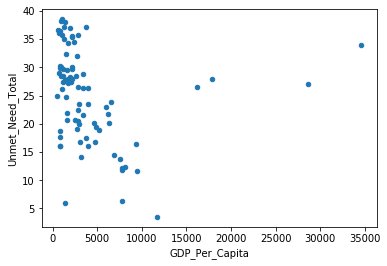

In [174]:
Africa_df.plot(kind='scatter', x = 'GDP_Per_Capita', y = 'Unmet_Need_Total');

In [175]:
Africa_df.corr()

,Year,GDP_Per_Capita,Unmet_Need_Total
Year,1.000000,0.150166,0.058759
GDP_Per_Capita,0.150166,1.000000,-0.188278
Unmet_Need_Total,0.058759,-0.188278,1.000000


In [176]:
from ipywidgets import interact

In [177]:
@interact(country=Africa_df.Country.dropna().unique())
def Africa(country):
    stuff=Africa_df.loc[Africa_df.Country==country][['Year','Unmet_Need_Total']]
    stuff=stuff.sort_values('Year')
    stuff.plot.bar(x='Year',y='Unmet_Need_Total')


interactive(children=(Dropdown(description='country', options=('Benin', 'Burkina Faso', 'Burundi', 'Cameroon',…

In [178]:
NorthAm_df = gdp_contraceptives_df[gdp_contraceptives_df['Continent']=='North America']

In [179]:
@interact(country=NorthAm_df.Country.dropna().unique())
def NorthAm(country):
    stuff=NorthAm_df.loc[NorthAm_df.Country==country][['Year','Unmet_Need_Total']]
    stuff=stuff.sort_values('Year')
    stuff.plot.bar(x='Year',y='Unmet_Need_Total')



interactive(children=(Dropdown(description='country', options=('Belize', 'Costa Rica', 'Dominican Republic', '…

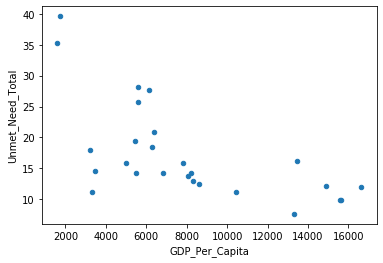

In [180]:
NorthAm_df.plot(kind='scatter', x = 'GDP_Per_Capita', y = 'Unmet_Need_Total');

In [181]:
NorthAm_df.corr()

,Year,GDP_Per_Capita,Unmet_Need_Total
Year,1.000000,0.246581,-0.098082
GDP_Per_Capita,0.246581,1.000000,-0.629990
Unmet_Need_Total,-0.098082,-0.629990,1.000000


In [182]:
Africa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 13 to 212
Data columns (total 10 columns):
Continent               86 non-null category
Country                 86 non-null object
Year                    86 non-null int64
GDP_Per_Capita          86 non-null float64
ISO Code                86 non-null object
Age                     86 non-null object
Unmet_Need_Total        86 non-null float64
Unmet Need: Spacing     86 non-null object
Unmet Need: Limiting    86 non-null object
Source                  86 non-null object
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 7.0+ KB


In [183]:
gdp_contraceptives_df.corr()

,Year,GDP_Per_Capita,Unmet_Need_Total
Year,1.000000,0.165735,-0.061885
GDP_Per_Capita,0.165735,1.000000,-0.343509
Unmet_Need_Total,-0.061885,-0.343509,1.000000


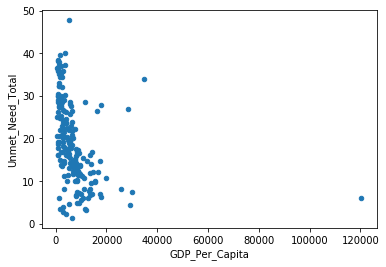

In [184]:
gdp_contraceptives_df.plot(kind='scatter', x = 'GDP_Per_Capita', y = 'Unmet_Need_Total');

In [185]:
gdp_contraceptives_df

,Continent,Country,Year,GDP_Per_Capita,ISO Code,Age,Unmet_Need_Total,Unmet Need: Spacing,Unmet Need: Limiting,Source
0,Europe,Albania,2002,6238.120489,008,15-44,1.3,1.0,0.3,RHS
1,Europe,Armenia,2010,6702.829370,051,15-49,13.5,5.3,8.2,DHS
2,Europe,Armenia,2005,5356.596456,051,15-49,19.3,3.9,15.5,DHS
3,Europe,Armenia,2000,2924.744521,051,15-49,18.1,3.5,14.6,DHS
4,Europe,Azerbaijan,2006,10882.234670,031,15-49,15.4,3.0,12.5,DHS
...,...,...,...,...,...,...,...,...,...,...
208,Asia,Yemen,1997,3729.732721,887,15-49,40.0,17.5,22.5,DHS
209,Africa,Zambia,2007,2797.889591,894,15-49,26.6,15.9,10.6,DHS
210,Africa,Zambia,1992,2185.120656,894,15-49,30.0,20.8,9.2,DHS
211,Africa,Zimbabwe,1999,3054.064189,716,15-49,16.7,8.5,8.2,DHS


In [186]:
# Need a facet grid and a widget scatterplot, how to do a heat map?? "pigal" 

In [187]:
import statsmodels.api as sm

X = gdp_contraceptives_df["GDP_Per_Capita"]
y = gdp_contraceptives_df["Unmet_Need_Total"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

# No linear relationship 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Unmet_Need_Total   R-squared (uncentered):                   0.155
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              38.99
Date:                Thu, 03 Oct 2019   Prob (F-statistic):                    2.29e-09
Time:                        17:45:29   Log-Likelihood:                         -939.25
No. Observations:                 213   AIC:                                      1880.
Df Residuals:                     212   BIC:                                      1884.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
GDP_Per_Capita     0.0007      0.000      6.244      0.000       0.000       0.001
==============================================================================
Omnibus:                       96.868   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              903.429
Skew:                          -1.483   Prob(JB):                    6.65e-197
Kurtosis:                      12.644   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
gdp_contraceptives_df['log_GDP_Per_Capita']=np.log(gdp_contraceptives_df['GDP_Per_Capita'])

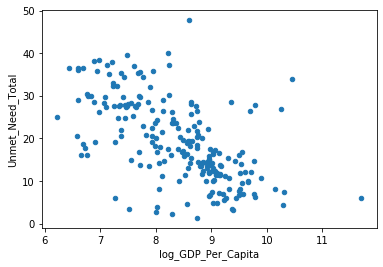

In [189]:
gdp_contraceptives_df.plot(kind='scatter', x = 'log_GDP_Per_Capita', y = 'Unmet_Need_Total');

In [190]:
X = gdp_contraceptives_df['log_GDP_Per_Capita']
y = gdp_contraceptives_df["Unmet_Need_Total"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Unmet_Need_Total   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              606.9
Date:                Thu, 03 Oct 2019   Prob (F-statistic):                    3.91e-64
Time:                        17:45:30   Log-Likelihood:                         -813.31
No. Observations:                 213   AIC:                                      1629.
Df Residuals:                     212   BIC:                                      1632.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
log_GDP_Per_Capita     2.2098      0.090     24.635      0.000       2.033       2.387
==============================================================================
Omnibus:                       18.664   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.918
Skew:                           0.296   Prob(JB):                       0.0116
Kurtosis:                       2.191   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
Africa_df_top=Africa_df.nlargest(5, 'GDP_Per_Capita')

In [192]:
Africa_df_top

,Continent,Country,Year,GDP_Per_Capita,ISO Code,Age,Unmet_Need_Total,Unmet Need: Spacing,Unmet Need: Limiting,Source
62,Africa,Equatorial Guinea,2011,34622.116266,226,15-49,34.0,22.0,12.0,DHS
109,Africa,Libya,2007,28600.429374,434,15-49,27.0,20.0,7.0,PAPFAM
69,Africa,Gabon,2000,17822.492238,266,15-49,27.9,19.7,8.1,DHS
68,Africa,Gabon,2012,16225.387524,266,15-49,26.5,18.7,7.7,DHS
120,Africa,Mauritius,2002,11673.664012,480,15-49,3.5,..,..,National survey


In [193]:
Africa_df_top=pd.DataFrame({'Country':['Equatorial Guinea','Libya','Gabon','Gabon','Mauritius'], 'Year':['2005','2005','2005','2005','2005'], 'Unmet_Need_Total':['34.0','27.0','27.9','26.5','3.5']})

In [194]:
Africa_df_top

,Country,Year,Unmet_Need_Total
0,Equatorial Guinea,2005,34.0
1,Libya,2005,27.0
2,Gabon,2005,27.9
3,Gabon,2005,26.5
4,Mauritius,2005,3.5


In [195]:
Africa_df_top_list=Africa_df_top.Country.tolist()

In [196]:
Africa_df_top_list

['Equatorial Guinea', 'Libya', 'Gabon', 'Gabon', 'Mauritius']

In [197]:
Africa_Facet=Africa_df.loc[Africa_df.GDP_Per_Capita.isin(Africa_df_top)]

In [198]:
Africa_Facet.head()

,Continent,Country,Year,GDP_Per_Capita,ISO Code,Age,Unmet_Need_Total,Unmet Need: Spacing,Unmet Need: Limiting,Source


In [199]:
# Create an empty list 
c_list =[] 
  
# Iterate over each row 
for index, rows in Africa_df_top.iterrows(): 
    # Create list for the current row 
    c_list =[rows.Country, rows.GDP_Per_Capita, rows.Unmet_Need_Total] 
      
    # append the list to the final list 
    c_list.append(c_list) 
  
# Print the list 
print(c_list) 

AttributeError: 'Series' object has no attribute 'GDP_Per_Capita'

In [ ]:
c_graph=sns.FacetGrid(Africa_df, col='Country', hue = 'Country')
c_graph.map(plt.plot, "GDP_Per_Capita","Unmet_Need_Total");
